In [3]:
!pip install cv2
!pip install matplotlib
!pip install numpy
!pip install opencv-python

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for cv2



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [319]:


def template_matching(img, template, threshold=0.7, min_distance=20, font_scale=1.0):
    # Chuyển ảnh sang grayscale nếu ảnh gốc là ảnh màu
    if len(img.shape) == 3:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img.copy()

    # Đảm bảo template là grayscale
    if len(template.shape) == 3:
        template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    else:
        template_gray = template.copy()
    
    # Kiểm tra template có phải là binary không
    unique_vals = np.unique(template_gray)
    is_binary_template = np.array_equal(unique_vals, [0, 255]) or np.array_equal(unique_vals, [0]) or np.array_equal(unique_vals, [255])
    
    # Nếu template là binary, chuyển ảnh gốc thành binary
    if is_binary_template:
        _, img_gray = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)

    # Kích thước template
    w, h = template_gray.shape[::-1]

    # Thực hiện template matching
    res = cv2.matchTemplate(img_gray, template_gray, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= threshold)
    points = np.column_stack((loc[1], loc[0]))  # Chuyển tọa độ (y, x) về (x, y)

    if len(points) == 0:
        plt.figure(figsize=(10, 6))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if len(img.shape) == 3 else img_gray, cmap='gray')
        plt.title("No objects found")
        plt.axis("off")
        plt.show()
        return 0

    # Lọc các điểm gần nhau bằng khoảng cách Euclidean
    detected_points = []
    for point in points:
        if not detected_points or np.all(np.linalg.norm(detected_points - point, axis=1) >= min_distance):
            detected_points.append(point)

    detected_points = np.array(detected_points)

    # Vẽ rectangles và đánh số
    for idx, (x, y) in enumerate(detected_points):
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(img, str(idx + 1), (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), 2, cv2.LINE_AA)

    # Hiển thị kết quả
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if len(img.shape) == 3 else img, cmap='gray')
    plt.title(f"There are {len(detected_points)} objects")
    plt.axis("off")
    plt.show()

    return len(detected_points)

# Ví dụ sử dụng:
# img = cv2.imread('image.jpg')
# template = cv2.imread('template.jpg', cv2.IMREAD_GRAYSCALE)  # Đọc template dưới dạng grayscale
# count = template_matching(img, template)


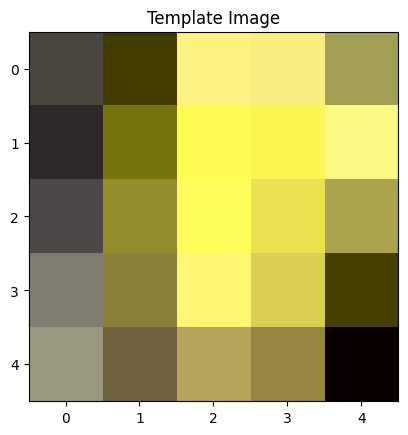

In [320]:


img = cv2.imread("image/cat.jpg")
template = img[226:231, 130:135]
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.title("Template Image")
plt.show()


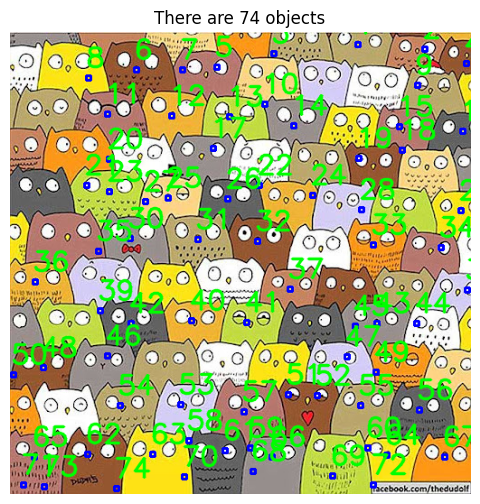

In [321]:

img = cv2.imread('image/cat.jpg')
count = template_matching(img, template, threshold=0.75, min_distance=20, font_scale=1.0)

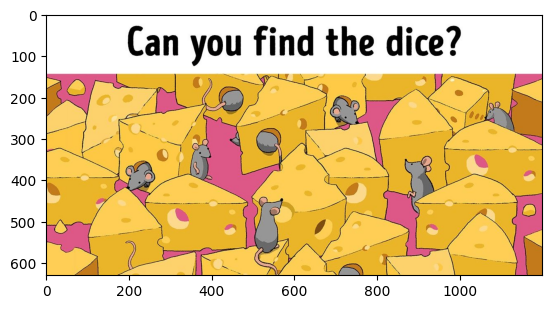

In [380]:
img2 = cv2.imread('image/mouse.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)


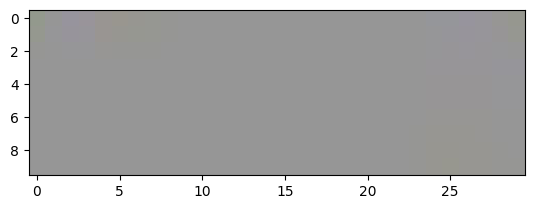

In [399]:
crop2 = img2[510:520, 520:550]
plt.imshow(crop2, cmap='gray')

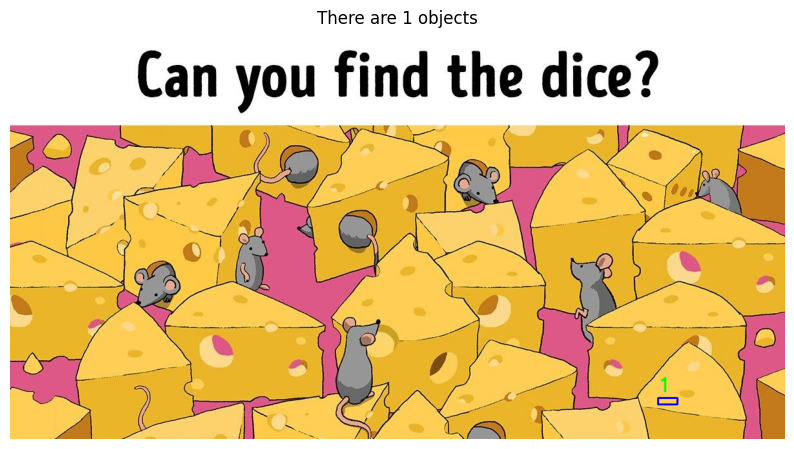

In [402]:
img = cv2.imread('image/mouse.jpg')
count = template_matching(img, crop2, threshold=0.6, min_distance=20, font_scale=1.0)


# Boots counting

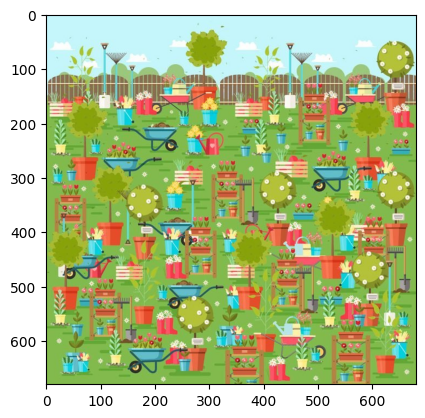

In [285]:
img3 = cv2.imread('image/pair_boot.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)

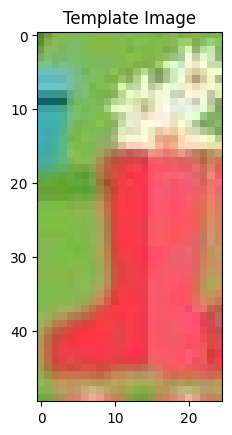

In [286]:


template2 = img3[515:565, 540:565]
plt.imshow(template2, cmap='gray')
plt.title("Template Image")
plt.show()


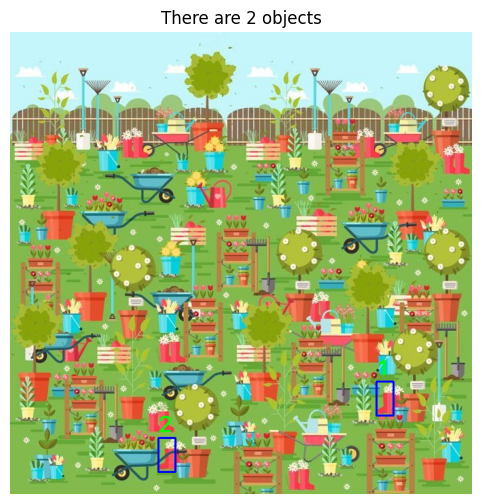

In [258]:

img = cv2.imread('image/pair_boot.jpg')
count = template_matching(img, template2, threshold=0.8, min_distance=20, font_scale=1.0)

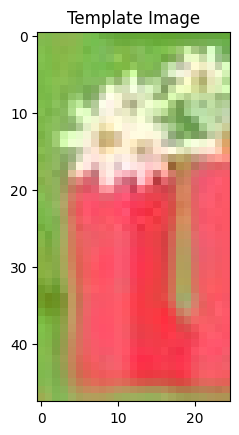

In [287]:
template3 = img3[542:590, 200:225]
plt.imshow(template3, cmap='gray')
plt.title("Template Image")
plt.show()

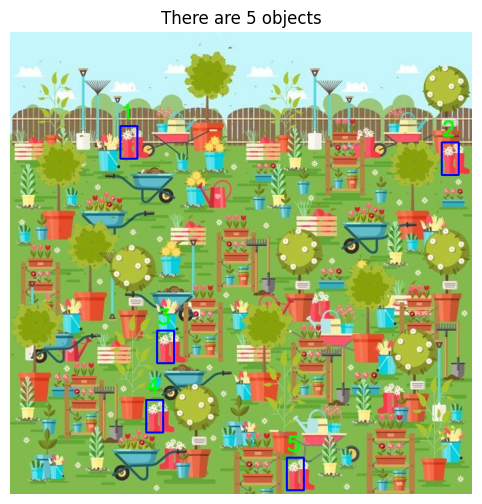

In [291]:
img = cv2.imread('image/pair_boot.jpg')
count = template_matching(img, template3, threshold=0.8, min_distance=20, font_scale=1.0)

# Rabbit

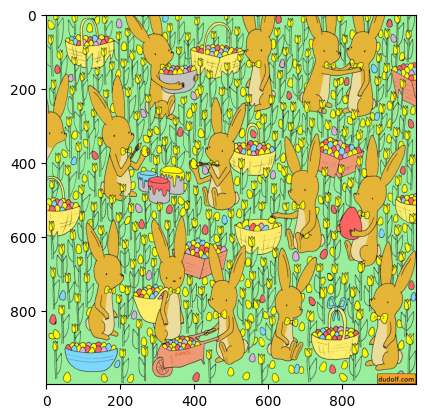

In [293]:
img4 = cv2.imread('image/rabbit.jpeg')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
plt.imshow(img4)

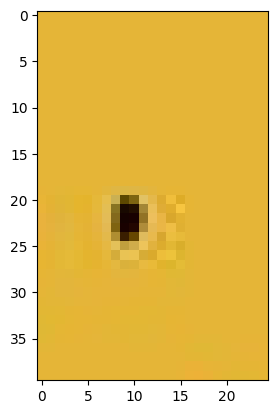

In [294]:
crop4 = img4[300:340, 0:25]
plt.imshow(crop4, cmap='gray')

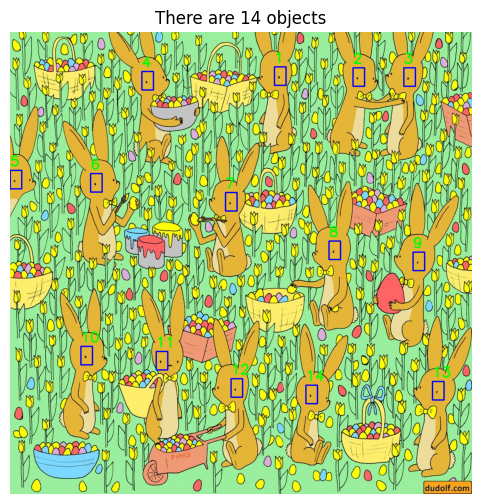

In [322]:
img = cv2.imread('image/rabbit.jpeg')
count = template_matching(img, crop4, threshold=0.7, min_distance=20, font_scale=1.0)

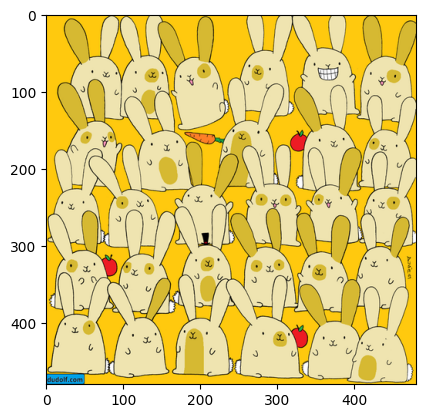

In [275]:
img5 = cv2.imread('image/rabbit2.png')
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
plt.imshow(img5)

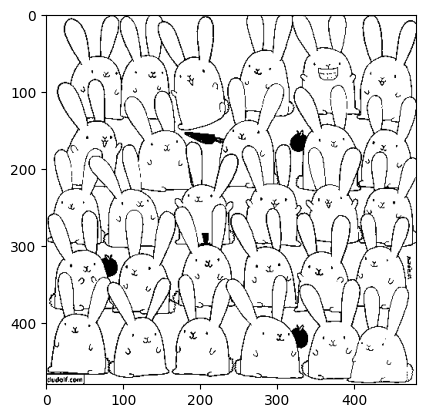

In [311]:
gray = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap='gray')

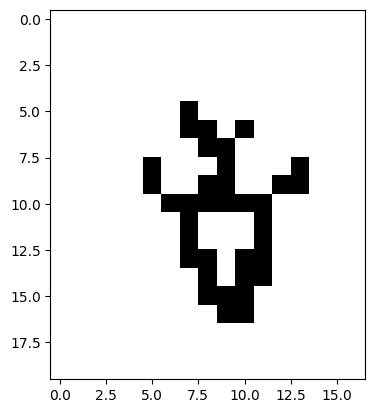

In [373]:
crop5 = binary[152:166, 246:262]
plt.imshow(crop5, cmap='gray')
crop6 = binary[235:255, 357:374]
plt.imshow(crop6, cmap='gray')

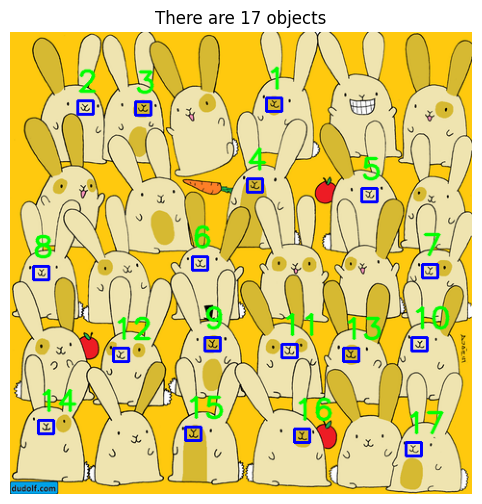

In [372]:
img = cv2.imread('image/rabbit2.png')
count = template_matching(img, crop5, threshold=0.6, min_distance=20, font_scale=1.0)

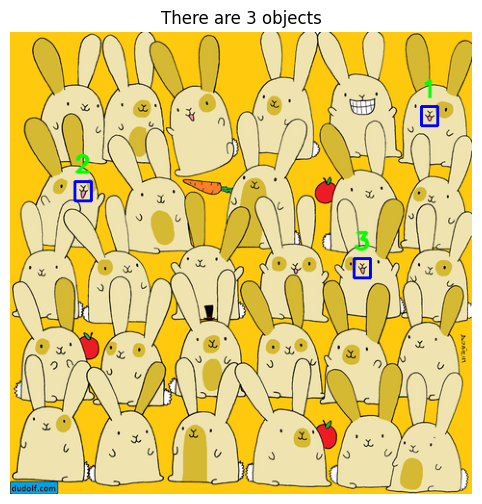

In [378]:
img = cv2.imread('image/rabbit2.png')
count = template_matching(img, crop6, threshold=0.55, min_distance=30, font_scale=0.8)